In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

## Generate Random Coordinates of World Cities

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list - unpack zip object into a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

584

## Retrieve, Collect, and Clean Weather Data

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chhapar
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | beringovskiy
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | vila
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | perleberg
Processing Record 11 of Set 1 | atar
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | palmer
Processing Record 14 of Set 1 | iracoubo
Processing Record 15 of Set 1 | adrar
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | ushuaia
Proces

Processing Record 35 of Set 4 | prado
Processing Record 36 of Set 4 | lavrentiya
Processing Record 37 of Set 4 | broken hill
Processing Record 38 of Set 4 | solano
Processing Record 39 of Set 4 | suba
Processing Record 40 of Set 4 | khani
Processing Record 41 of Set 4 | itoman
Processing Record 42 of Set 4 | san rafael
Processing Record 43 of Set 4 | mecca
Processing Record 44 of Set 4 | boundiali
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | skjervoy
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | kahului
Processing Record 49 of Set 4 | senneterre
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | batemans bay
Processing Record 2 of Set 5 | meridian
Processing Record 3 of Set 5 | ust-maya
Processing Record 4 of Set 5 | zhangjiakou
Processing Record 5 of Set 5 | swellendam
Processing Record 6 of Set 5 | solnechnyy
Processing Record 7 of Set 5 | port hawkesbury
Processing Record 8 of Set 5 | sompeta
Processing Reco

Processing Record 26 of Set 8 | jabinyanah
Processing Record 27 of Set 8 | sorland
Processing Record 28 of Set 8 | motygino
Processing Record 29 of Set 8 | san cristobal
Processing Record 30 of Set 8 | tomatlan
Processing Record 31 of Set 8 | mohan
Processing Record 32 of Set 8 | vestmanna
Processing Record 33 of Set 8 | pabellon de hidalgo
Processing Record 34 of Set 8 | riyadh
Processing Record 35 of Set 8 | kayerkan
Processing Record 36 of Set 8 | sakhon nakhon
Processing Record 37 of Set 8 | jalu
Processing Record 38 of Set 8 | cravo norte
Processing Record 39 of Set 8 | kysyl-syr
Processing Record 40 of Set 8 | wellington
Processing Record 41 of Set 8 | mogadishu
Processing Record 42 of Set 8 | russell
Processing Record 43 of Set 8 | svetlogorsk
Processing Record 44 of Set 8 | churapcha
Processing Record 45 of Set 8 | freeport
Processing Record 46 of Set 8 | nyrob
Processing Record 47 of Set 8 | cayenne
Processing Record 48 of Set 8 | phonhong
Processing Record 49 of Set 8 | buala

Processing Record 15 of Set 12 | puerto madryn
Processing Record 16 of Set 12 | miahuatlan
Processing Record 17 of Set 12 | cockburn town
Processing Record 18 of Set 12 | north bend
Processing Record 19 of Set 12 | krasnoturansk
Processing Record 20 of Set 12 | boende
Processing Record 21 of Set 12 | dhidhdhoo
Processing Record 22 of Set 12 | praya
Processing Record 23 of Set 12 | boa vista
Processing Record 24 of Set 12 | port-de-paix
City not found. Skipping...
Processing Record 25 of Set 12 | hay river
Processing Record 26 of Set 12 | alekseyevsk
Processing Record 27 of Set 12 | borba
Processing Record 28 of Set 12 | havre-saint-pierre
Processing Record 29 of Set 12 | salalah
Processing Record 30 of Set 12 | jining
Processing Record 31 of Set 12 | keflavik
Processing Record 32 of Set 12 | labrea
Processing Record 33 of Set 12 | san andres
Processing Record 34 of Set 12 | cabedelo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chhapar,27.8167,74.4000,53.69,79,81,8.41,IN,2022-01-22 23:12:00
1,Punta Arenas,-53.1500,-70.9167,53.71,66,75,6.91,CL,2022-01-22 23:12:00
2,Beringovskiy,63.0500,179.3167,-5.19,96,100,9.22,RU,2022-01-22 23:12:00
3,Victoria,22.2855,114.1577,66.18,87,100,1.99,HK,2022-01-22 23:07:43
4,Vila,42.0304,-8.1588,37.33,72,4,4.25,PT,2022-01-22 23:12:00
5,Busselton,-33.6500,115.3333,72.09,46,4,6.73,AU,2022-01-22 23:12:01
6,Tuktoyaktuk,69.4541,-133.0374,-0.26,88,100,17.67,CA,2022-01-22 23:12:01
7,Butaritari,3.0707,172.7902,82.83,71,92,12.62,KI,2022-01-22 23:12:01
8,Perleberg,53.0667,11.8667,41.90,91,99,7.81,DE,2022-01-22 23:12:01
9,Atar,20.5169,-13.0499,73.90,15,99,10.04,MR,2022-01-22 23:12:02


In [8]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chhapar,IN,2022-01-22 23:12:00,27.8167,74.4000,53.69,79,81,8.41
1,Punta Arenas,CL,2022-01-22 23:12:00,-53.1500,-70.9167,53.71,66,75,6.91
2,Beringovskiy,RU,2022-01-22 23:12:00,63.0500,179.3167,-5.19,96,100,9.22
3,Victoria,HK,2022-01-22 23:07:43,22.2855,114.1577,66.18,87,100,1.99
4,Vila,PT,2022-01-22 23:12:00,42.0304,-8.1588,37.33,72,4,4.25
5,Busselton,AU,2022-01-22 23:12:01,-33.6500,115.3333,72.09,46,4,6.73
6,Tuktoyaktuk,CA,2022-01-22 23:12:01,69.4541,-133.0374,-0.26,88,100,17.67
7,Butaritari,KI,2022-01-22 23:12:01,3.0707,172.7902,82.83,71,92,12.62
8,Perleberg,DE,2022-01-22 23:12:01,53.0667,11.8667,41.90,91,99,7.81
9,Atar,MR,2022-01-22 23:12:02,20.5169,-13.0499,73.90,15,99,10.04


In [29]:
# Replace 'NA' country code to 'Namibia' to avoid NaN error later when working with CSV
city_data_df["Country"] = city_data_df["Country"].str.replace("NA","Namibia")
city_data_df.head(35)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chhapar,IN,2022-01-22 23:12:00,27.8167,74.4000,53.69,79,81,8.41
1,Punta Arenas,CL,2022-01-22 23:12:00,-53.1500,-70.9167,53.71,66,75,6.91
2,Beringovskiy,RU,2022-01-22 23:12:00,63.0500,179.3167,-5.19,96,100,9.22
3,Victoria,HK,2022-01-22 23:07:43,22.2855,114.1577,66.18,87,100,1.99
4,Vila,PT,2022-01-22 23:12:00,42.0304,-8.1588,37.33,72,4,4.25
5,Busselton,AU,2022-01-22 23:12:01,-33.6500,115.3333,72.09,46,4,6.73
6,Tuktoyaktuk,CA,2022-01-22 23:12:01,69.4541,-133.0374,-0.26,88,100,17.67
7,Butaritari,KI,2022-01-22 23:12:01,3.0707,172.7902,82.83,71,92,12.62
8,Perleberg,DE,2022-01-22 23:12:01,53.0667,11.8667,41.90,91,99,7.81
9,Atar,MR,2022-01-22 23:12:02,20.5169,-13.0499,73.90,15,99,10.04


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Weather Data

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

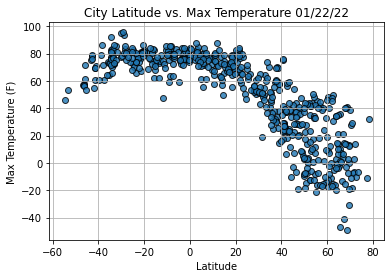

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

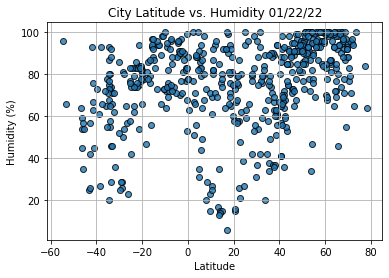

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

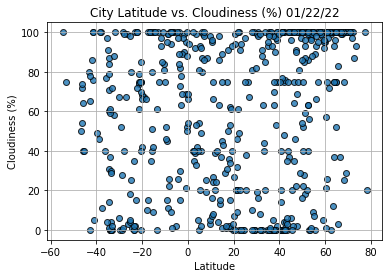

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

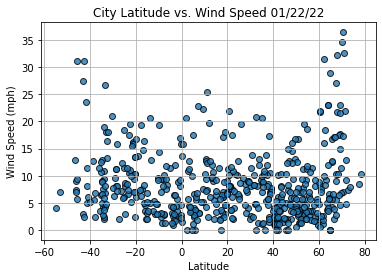

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

## Determine Correlations

In [16]:
# Import linregress
from scipy.stats import linregress

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

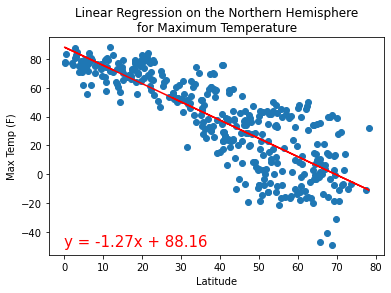

LinregressResult(slope=-1.2667486215510806, intercept=88.16016998446648, rvalue=-0.824445850345404, pvalue=9.323252283659597e-93, stderr=0.04539064045271594, intercept_stderr=2.0199764376807026)

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp (F)',(0,-50))
linregress(x_values, y_values)

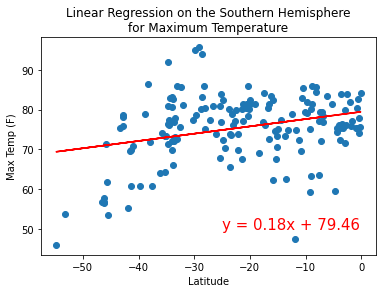

LinregressResult(slope=0.18322553071450795, intercept=79.45787359366798, rvalue=0.2983035848150855, pvalue=8.587406397824062e-05, stderr=0.0455026016854293, intercept_stderr=1.171766300329058)

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp (F)',(-25,50))
linregress(x_values, y_values)

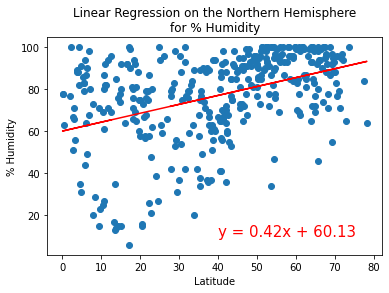

LinregressResult(slope=0.42381017574351765, intercept=60.134041615887625, rvalue=0.4082142107367009, pvalue=2.989685751157364e-16, stderr=0.049472841601625364, intercept_stderr=2.2016427471318782)

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))
linregress(x_values, y_values)

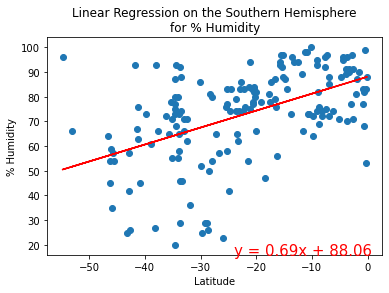

LinregressResult(slope=0.6854589333878733, intercept=88.0619133998318, rvalue=0.5037517257417712, pvalue=3.3912059567369456e-12, stderr=0.09123225804055124, intercept_stderr=2.3493796291888684)

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-24,16))
linregress(x_values, y_values)

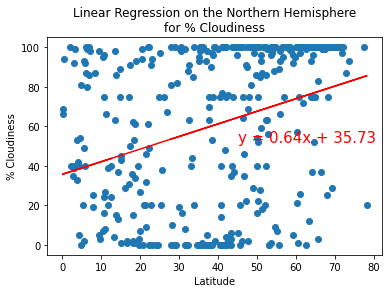

LinregressResult(slope=0.6374327530124938, intercept=35.72787163585045, rvalue=0.3300330495434601, pvalue=7.964475551300336e-11, stderr=0.09517038288382591, intercept_stderr=4.235276900105437)

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(45,52))
linregress(x_values, y_values)

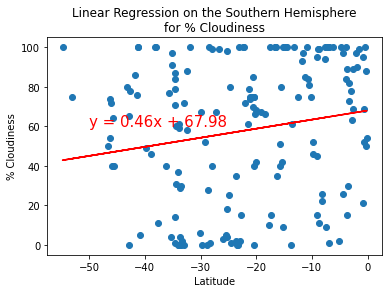

LinregressResult(slope=0.4586862775492492, intercept=67.98150000171178, rvalue=0.17573484672640602, pvalue=0.02269444010275752, stderr=0.19943068532834496, intercept_stderr=5.13566582268885)

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))
linregress(x_values, y_values)

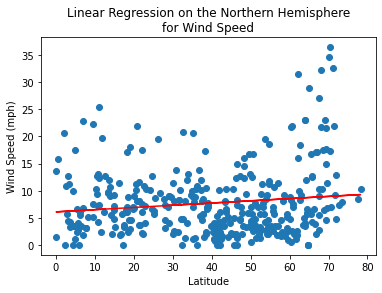

LinregressResult(slope=0.04075393765493256, intercept=6.091089080202725, rvalue=0.13080513832830554, pvalue=0.011904116877232819, stderr=0.01612368117512584, intercept_stderr=0.7175368256008232)

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed (mph)',(0,40))
linregress(x_values, y_values)

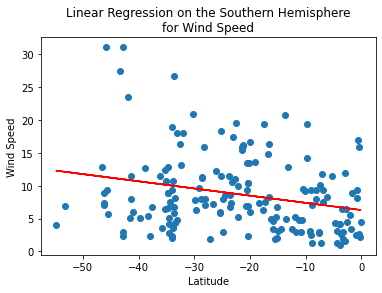

LinregressResult(slope=-0.10936017212588774, intercept=6.298427216627076, rvalue=-0.2536871129047111, pvalue=0.0009064442639130873, stderr=0.03236396973645365, intercept_stderr=0.8334250719160411)

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-25,40))
linregress(x_values, y_values)